# Iteración 3 - Modelo con XGBoost

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve
from xgboost import XGBClassifier

XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ["dlopen(/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib, 0x0006): Library not loaded: @rpath/libomp.dylib\n  Referenced from: <948FC7F9-7446-3923-BB9F-85890E78C765> /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: tried: '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/libomp/lib/libomp.dylib' (no such file)"]


In [14]:
original = pd.read_csv("Copia de Dataset_vuelos.csv",nrows=5500)

In [15]:
original = original.drop(columns=['FlightDate', 'ArrDelay', 'ArrDelayMinutes', 'AirTime'], errors='ignore')
original = original.dropna()

In [16]:
df_0 = original[original['is_delay'] == 0]
df_1 = original[original['is_delay'] == 1]
df_1_oversampled = df_1.sample(n=len(df_0), replace=True, random_state=42)
df_balanced = pd.concat([df_0, df_1_oversampled]).sample(frac=1, random_state=42)

In [17]:
# Modelo Final
features = [
    'CRSDepTime', 'Month', 'Year', 'DayOfWeek', 'Quarter', 'Distance',
    'OriginState_GA', 'Dest_SFO', 'DestState_GA', 'Dest_ORD', 'DestState_IL',
    'Reporting_Airline_UA', 'Reporting_Airline_WN', 'DestState_CA', 'Dest_PHX', 'Origin_SFO',
    'Origin_CA', 'Origin_TX', 'Reporting_Airline_DL'
]

In [18]:
cat_cols = ['Origin', 'Dest', 'OriginState', 'DestState', 'Reporting_Airline']
df_balanced_dummies = pd.get_dummies(df_balanced, columns=cat_cols, drop_first=True, dtype=int)

In [19]:
features_final = [col for col in features if col in df_balanced_dummies.columns]

In [21]:
X = df_balanced_dummies[features_final]
y = df_balanced_dummies['is_delay']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
model = LogisticRegression(C=1.0, max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [26]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
ks = max(tpr - fpr)

In [28]:
print("Matriz de Confusión:")
print(conf_matrix)
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"KS: {ks:.3f}")

Matriz de Confusión:
[[753 551]
 [557 747]]
Accuracy: 0.575
Precision: 0.576
Recall: 0.573
KS: 0.160


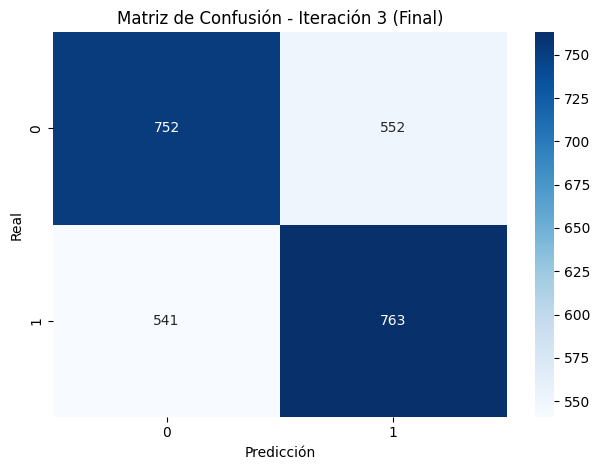

In [12]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Iteración 3 (Final)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()